# The logging for $S^2$Generator

The core of the $S^2$ data generation mechanism is to randomly construct a large number of symbolic expressions (complex systems) $f(\cdot)$ and stimulus time series $X$, and obtain the response of the complex system by inputting the stimulus into the complex system:
$$
Y = f(X).
$$

However, in this process, since the generated symbolic expression $f(\cdot)$ has a domain, for example, the domain of $f(x) = \mathrm{ln} (x)$ is $x \in (0, + \infty ]$, the domain of $f(x) = \frac{1}{x}$ is $x \in \left \{ x | x \ne 0 \right \}$. Although we usually replace $f(x) = \mathrm{ln}(x)$ and $f(x) = \frac{1}{x}$ with $f(x) = \mathrm{ln}(|x|)$ and $f(x) = \frac{1}{x + \varepsilon}$ respectively when constructing symbolic expressions to increase the range of their domains without changing their symbolic operation logic, there are still many cases where the values fall outside the domain. When this happens, we will abandon the time series data and generate a new $X$ for resampling.

In addition, since we use the power operation pow and exponent exp when constructing the complex system $f(\cdot)$, numerical explosion may occur when performing numerical sampling. To this end, we will limit the value of the response time series to a certain range to improve the quality of the basic representation of the time series data.

For these two reasons, we provide a status monitoring module for the data generation process. This module allows you to intuitively determine whether the stimulus time series data is successfully sampled and how many times it has been successfully sampled. You can specify the `print_status` and `logging_path` parameters in `Generator` to print and log status information during the execution of the data generation algorithm.

In [1]:
import numpy as np

# Importing data generators, parameter controllers and visualization functions
from S2Generator import Generator, SeriesParams, SymbolParams, plot_series

Basic Config of The S2Generator:
  mixed_distribution:  0.1                 autoregressive_moving_average: 0.2                 
  forecast_pfn:        0.35                kernel_synth:        0.25                
  intrinsic_mode_function: 0.1                 
  Min Binary Operator: 0                   Max Binary Operator: 1                   
  Min Unary Operator:  0                   Max Unary Operator:  5                   
  Max Trials:          64                  Solve Diff           0                   
  Probability Random:  0.25                Probability Const:   0.25                

Generation Config of The S2Generator:
  Time Series Length:  256                   Max Trials:          64                  
  Input Dimension:     1                     Output Dimension:    1                   
  Input Normalization: z-score               Output Normalization: z-score             
  Input Max Scale:     16.0                  Output Max Scale:    16.0                
  Offset   

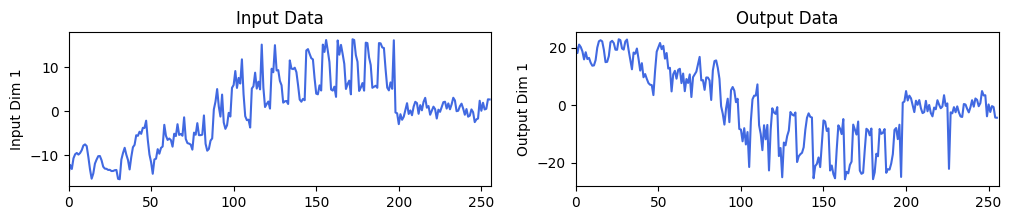

In [2]:
# Create an instance and print the status for the generation
generator = Generator(print_status=True)

# Creating a random number object
rng = np.random.RandomState(0)

# Start generating symbolic expressions, sampling and generating series
trees, x, y = generator.run(
    rng, input_dimension=1, output_dimension=1, n_inputs_points=256
)

# Visualize the time series
fig = plot_series(x, y)

Basic Config of The S2Generator:
  mixed_distribution:  0.1                 autoregressive_moving_average: 0.2                 
  forecast_pfn:        0.35                kernel_synth:        0.25                
  intrinsic_mode_function: 0.1                 
  Min Binary Operator: 0                   Max Binary Operator: 1                   
  Min Unary Operator:  0                   Max Unary Operator:  5                   
  Max Trials:          64                  Solve Diff           0                   
  Probability Random:  0.25                Probability Const:   0.25                

Generation Config of The S2Generator:
  Time Series Length:  256                   Max Trials:          64                  
  Input Dimension:     1                     Output Dimension:    1                   
  Input Normalization: z-score               Output Normalization: z-score             
  Input Max Scale:     16.0                  Output Max Scale:    16.0                
  Offset   

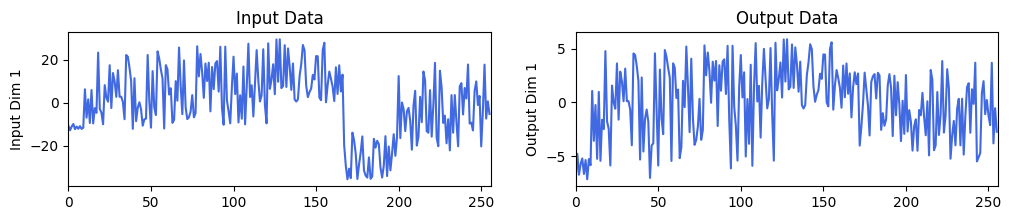

In [3]:
# Add the params `logging_path` to save the stats
generator = Generator(print_status=True, logging_path=".")

# Start generating symbolic expressions, sampling and generating series
trees, x, y = generator.run(
    np.random.RandomState(1), input_dimension=1, output_dimension=1, n_inputs_points=256
)

# Visualize the time series
fig = plot_series(x, y)

Basic Config of The S2Generator:
  mixed_distribution:  0.1                 autoregressive_moving_average: 0.2                 
  forecast_pfn:        0.35                kernel_synth:        0.25                
  intrinsic_mode_function: 0.1                 
  Min Binary Operator: 0                   Max Binary Operator: 1                   
  Min Unary Operator:  0                   Max Unary Operator:  5                   
  Max Trials:          64                  Solve Diff           0                   
  Probability Random:  0.25                Probability Const:   0.25                

Generation Config of The S2Generator:
  Time Series Length:  256                   Max Trials:          64                  
  Input Dimension:     4                     Output Dimension:    4                   
  Input Normalization: z-score               Output Normalization: z-score             
  Input Max Scale:     16.0                  Output Max Scale:    16.0                
  Offset   

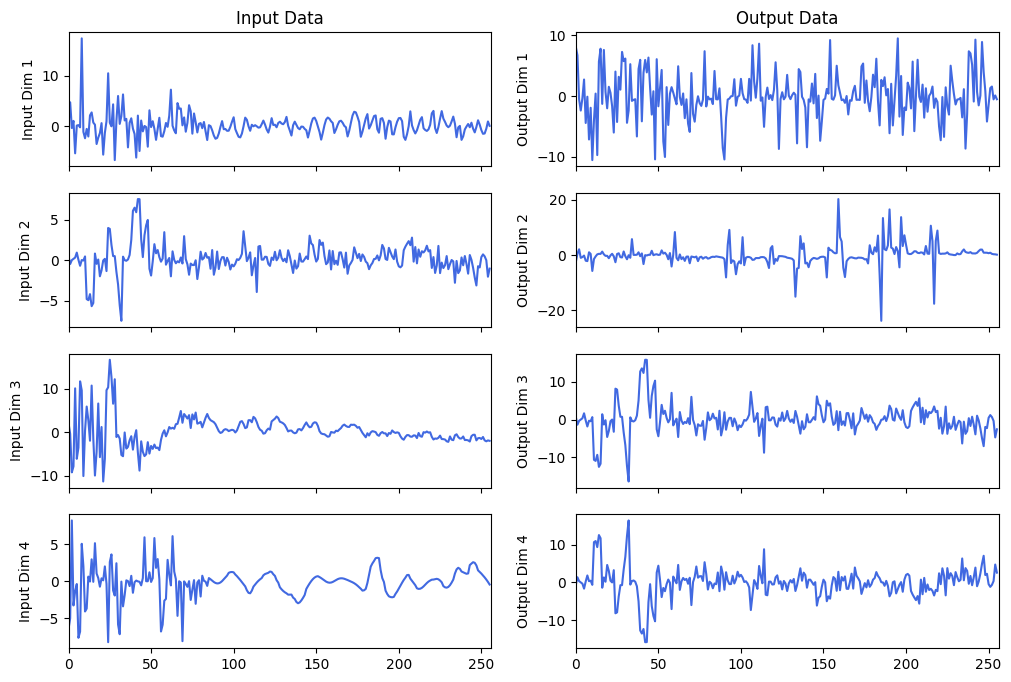

In [4]:
# We can also generate the multivariate input and output time series
trees, x, y = generator.run(
    rng, input_dimension=4, output_dimension=4, n_inputs_points=256
)

# Visualize the time series
fig = plot_series(x, y)